In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [161]:
data = pd.read_csv('D:/MLDatasets/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [162]:
print ('Data Types:')
print (data.dtypes)

Data Types:
Month          object
#Passengers     int64
dtype: object


In [163]:
data = pd.read_csv('D:/MLDatasets/AirPassengers.csv', parse_dates=True, index_col='Month')
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [164]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [165]:
# Display first 10 rows
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [166]:
ts['1949-01-01']

112

In [167]:
# Import the datetime library and use 'datetime'function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [168]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [169]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [170]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

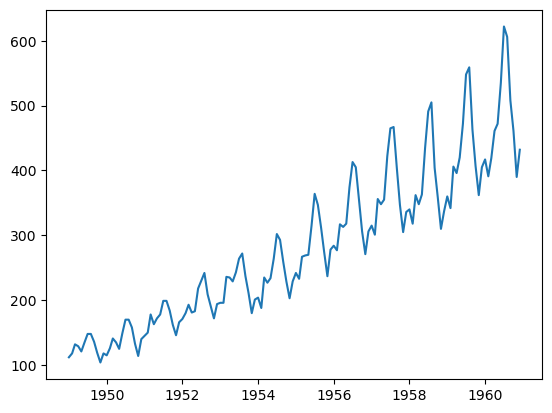

In [171]:
plt.plot(ts)

In [172]:
# Calculate moving average and standard deviation


In [173]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,m, s):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(10, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
     
#Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)

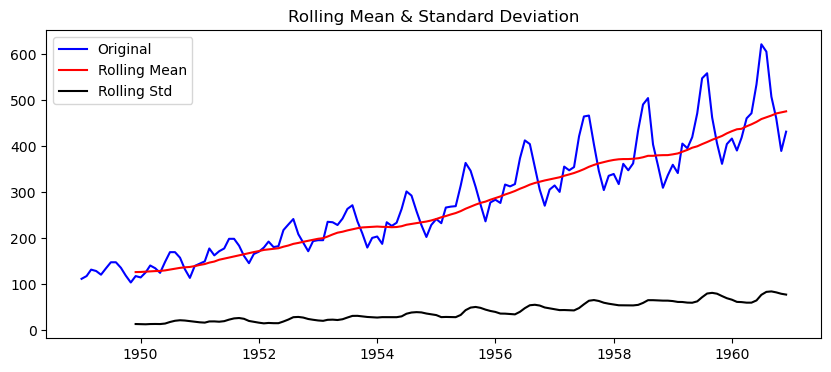

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [174]:
test_stationarity(ts,rolmean,rolstd)

In [175]:
# check with 1% critical value
0.815369 <-3.481682

False

In [176]:
# check with 5% critical value
0.815369 < -2.884042

False

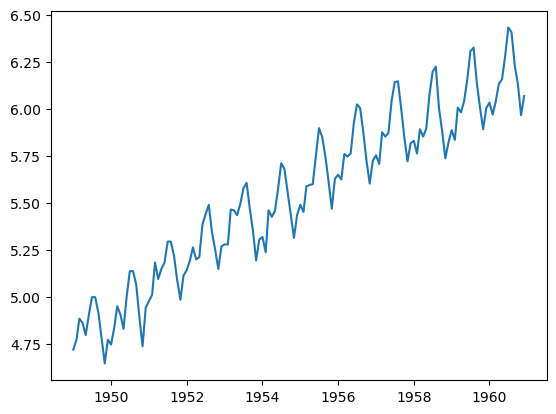

In [177]:
import numpy as np
ts_log = np.log(ts)
plt.plot(ts_log)

### Moving Average

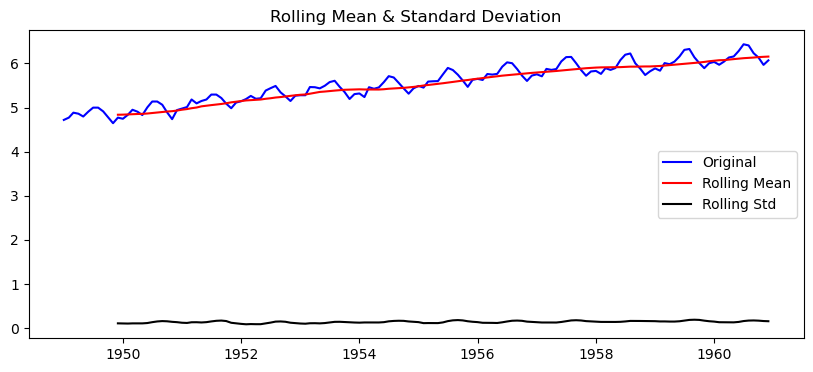

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [178]:
moving_avg = ts_log.rolling(window=12).mean()
moving_std = ts_log.rolling(window=12).std()
test_stationarity(ts_log,moving_avg,moving_std)

In [179]:
-1.717017 < -3.481682

False

In [180]:
-1.717017 <-2.884042

False

In [187]:
## Now  subtract the rolling mean from the original value
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.051311
Name: #Passengers, dtype: float64

In [188]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.051311
1950-01-01   -0.085902
1950-02-01   -0.001252
1950-03-01    0.107574
1950-04-01    0.061409
Name: #Passengers, dtype: float64

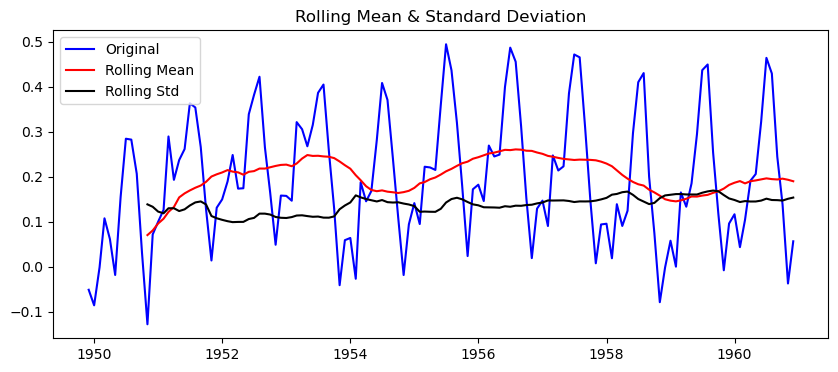

Results of Dickey-Fuller Test:
Test Statistic                  -3.060054
p-value                          0.029654
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
dtype: float64
Test Statistic                  -3.060054
p-value                          0.029654
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
dtype: float64
Test Statistic                  -3.060054
p-value                          0.029654
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [189]:
moving_avg = ts_log_moving_avg_diff.rolling(window=12).mean()
moving_std = ts_log_moving_avg_diff.rolling(window=12).std()
test_stationarity(ts_log_moving_avg_diff,moving_avg,moving_std)

In [202]:
-3.060054 <-3.486535

False

In [203]:
-3.060054 <-2.886151

True

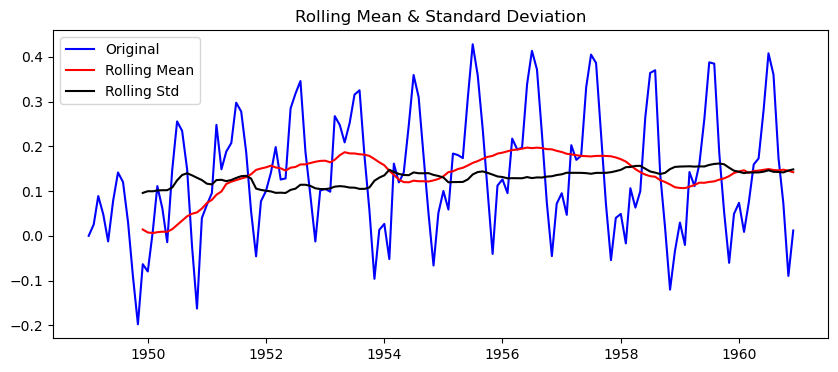

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [205]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
moving_avg = expwighted_avg.rolling(window=12).mean()
moving_std= expwighted_avg.rolling(window=12).std()
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff, moving_avg, moving_std)

In [206]:
-3.601262 < -3.481682

True

## Eliminating Trend and Seasonality

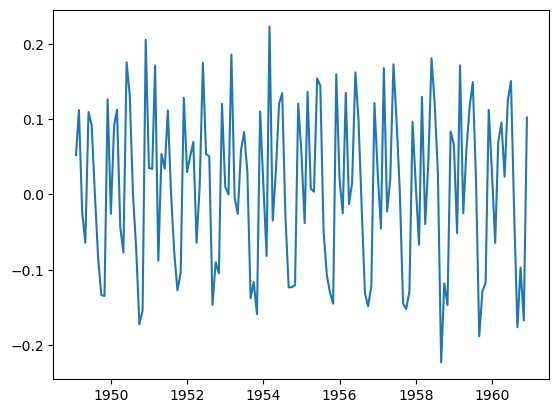

In [208]:
ts_log_diff= ts_log - ts_log.shift()
plt.plot(ts_log_diff)

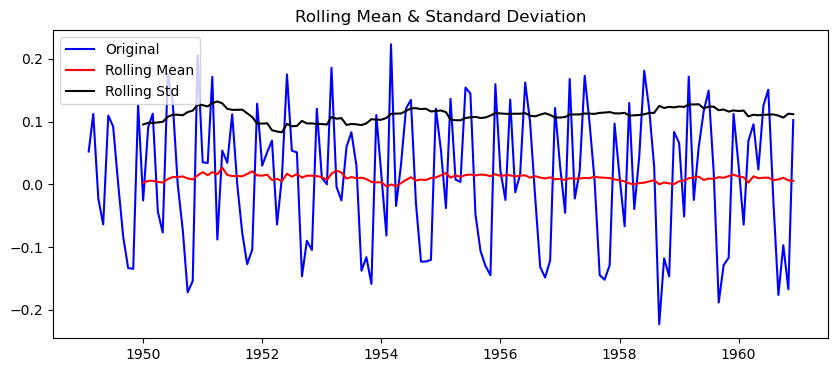

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
dtype: float64
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
dtype: float64
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [209]:
ts_log_diff.dropna(inplace=True)
moving_avg = ts_log_diff.rolling(window=12).mean()
moving_std= ts_log_diff.rolling(window=12).std()
test_stationarity(ts_log_diff,moving_avg, moving_std)

In [210]:
#Test statistics < Critical Value(1%)
-2.717131 < -3.482501

False

In [211]:
-2.717131 < -2.884398

False

In [212]:
-2.717131 <-2.578960

True

## Decomposing

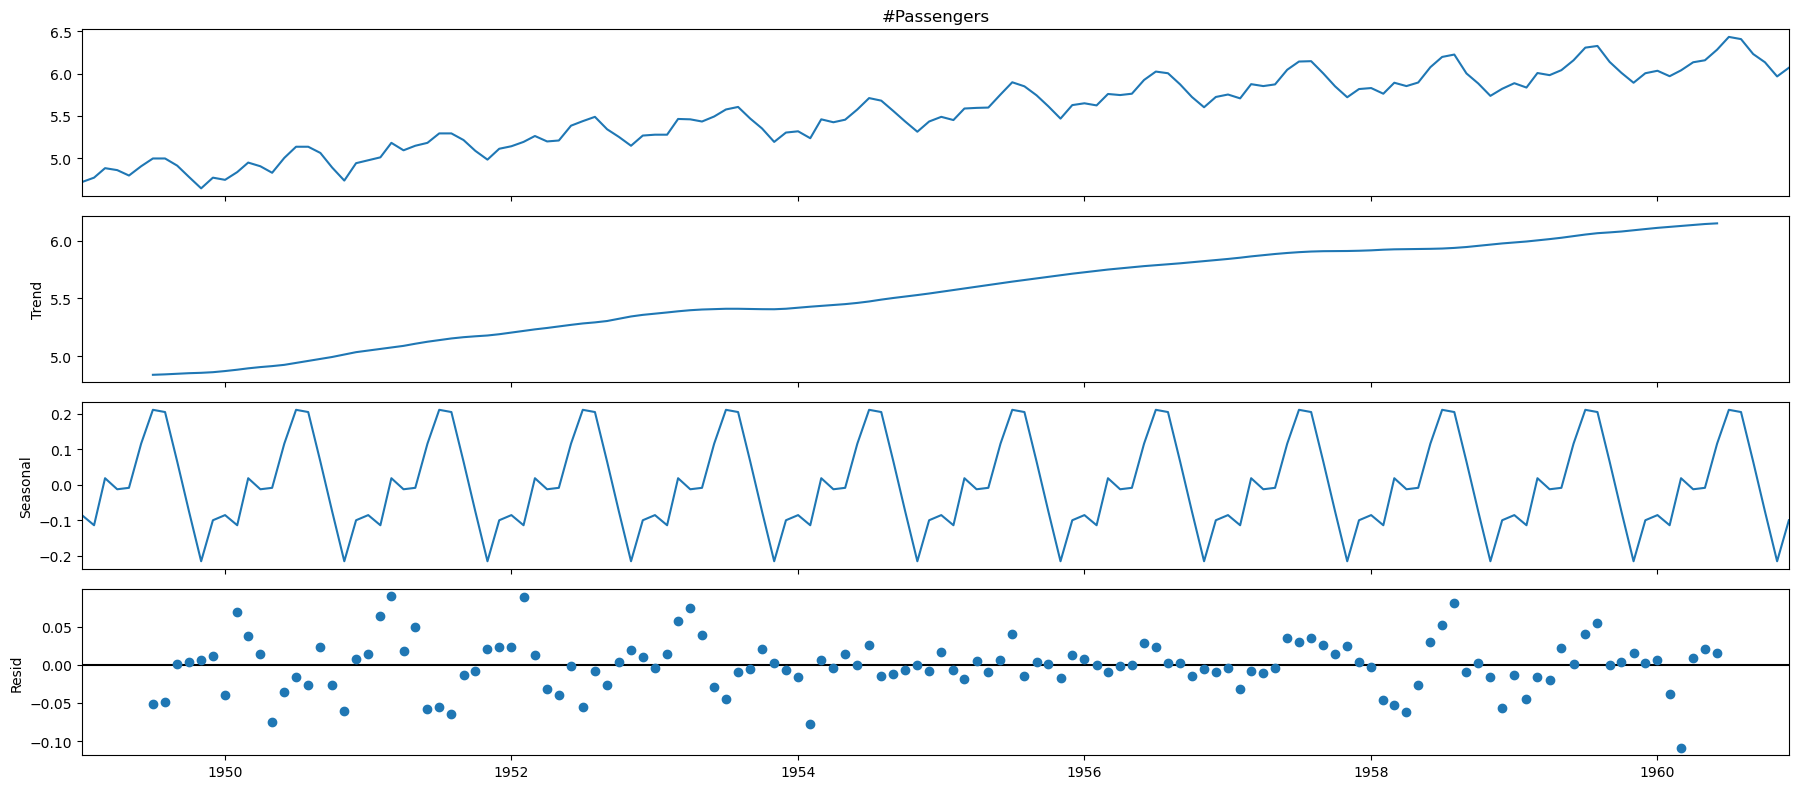

In [213]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']= 18,8
decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig  = decomposition.plot()
plt.show()

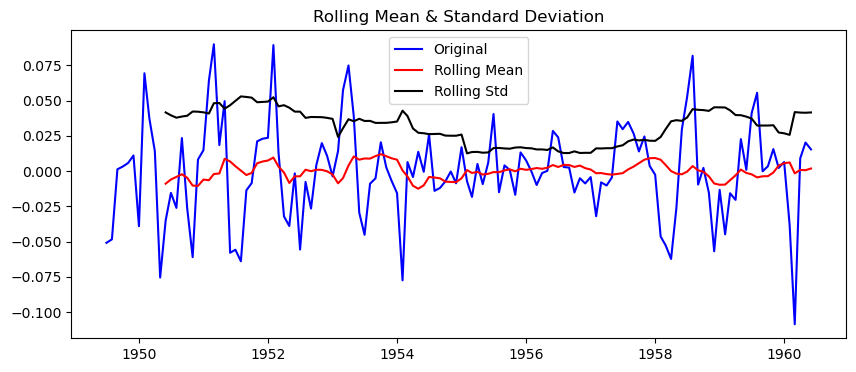

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
dtype: float64
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
dtype: float64
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [215]:
ts_log_decompose = decomposition.resid
ts_log_decompose.dropna(inplace=True)
moving_avg = ts_log_decompose.rolling(window=12).mean()
moving_std = ts_log_decompose.rolling(window=12).std()
test_stationarity(ts_log_decompose, moving_avg, moving_std)

### Forecasting a time Series

In [216]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

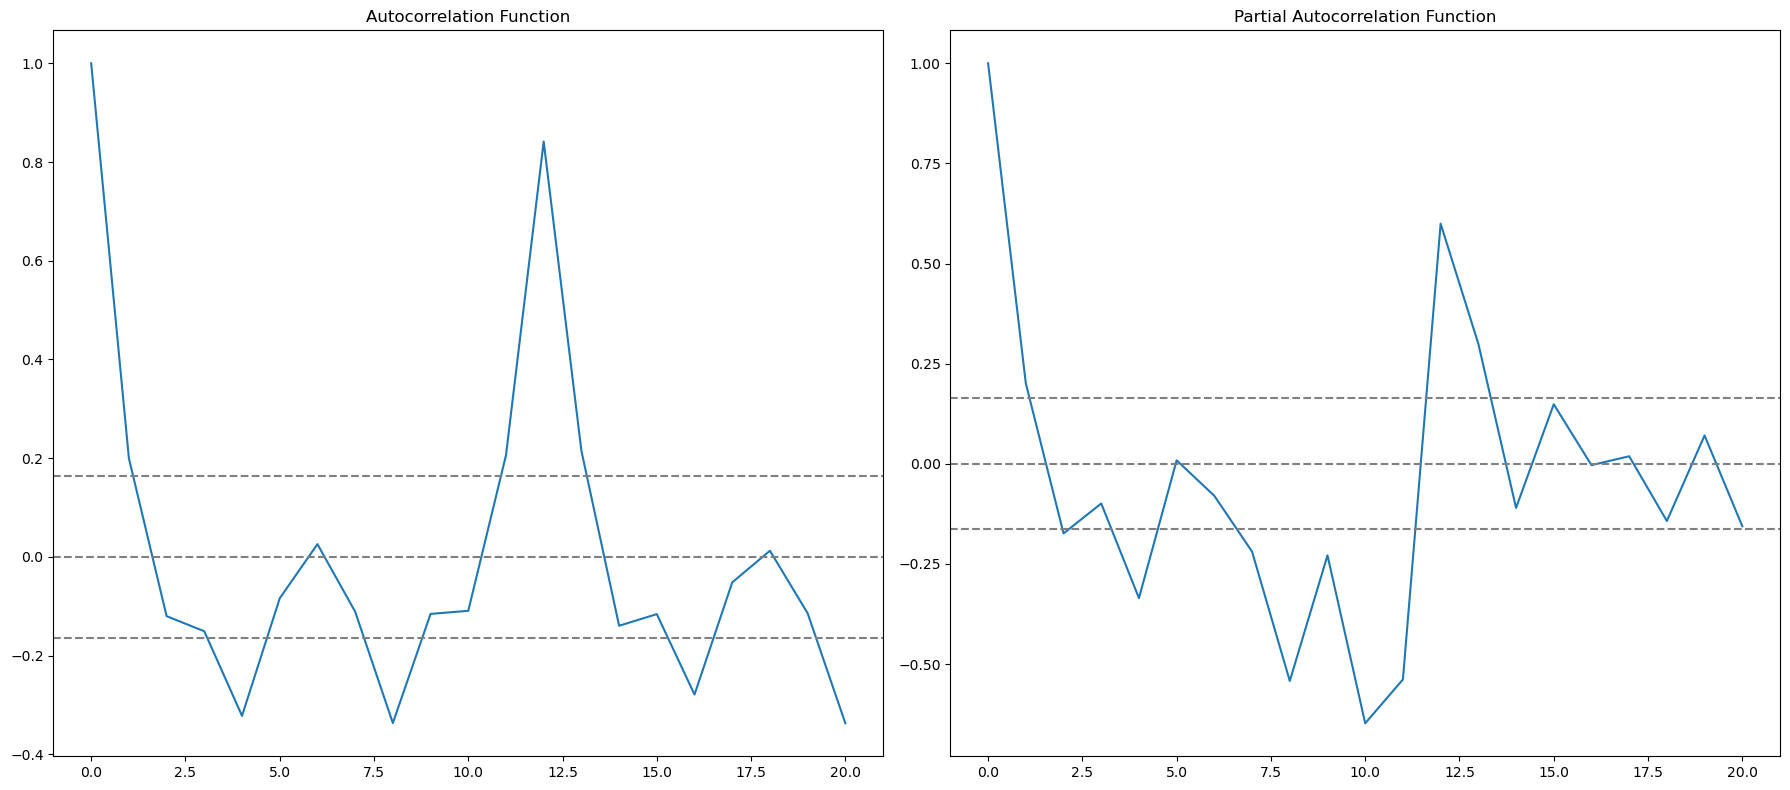

In [218]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',
           color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',
           color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',
           color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',
           color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

AR Model

In [219]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore','statsmodels.tsa.arima_model.ARIMA', FutureWarning)
warnings.filterwarnings('ignore','statsmodels.tsa.arima_model.ARMA', FutureWarning)

Text(0.5, 1.0, 'RSS:1.50')

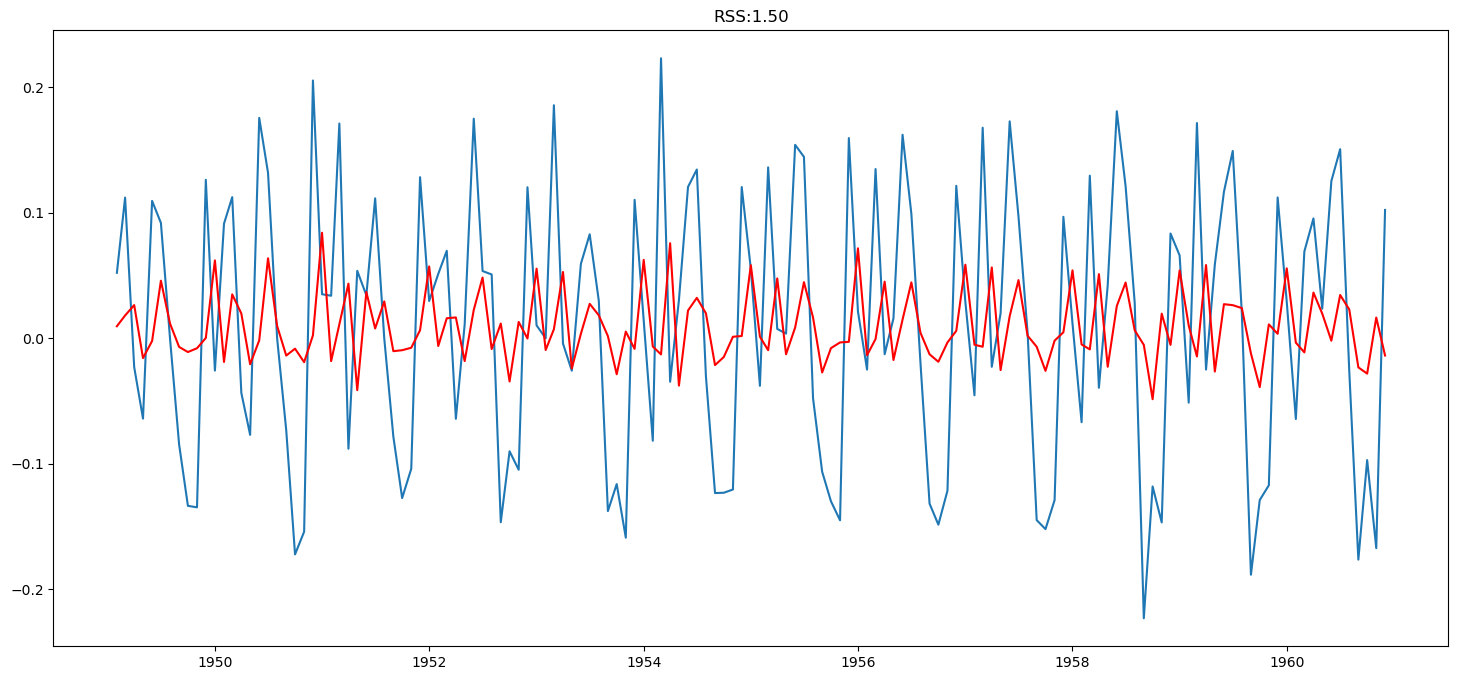

In [223]:
from statsmodels.tsa.arima.model import ARIMA
#AR MODEL
model = ARIMA(ts_log_diff, order=(2, 0, 0),freq='MS')
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS:%.2f'%sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

Text(0.5, 1.0, 'RSS: 1.47')

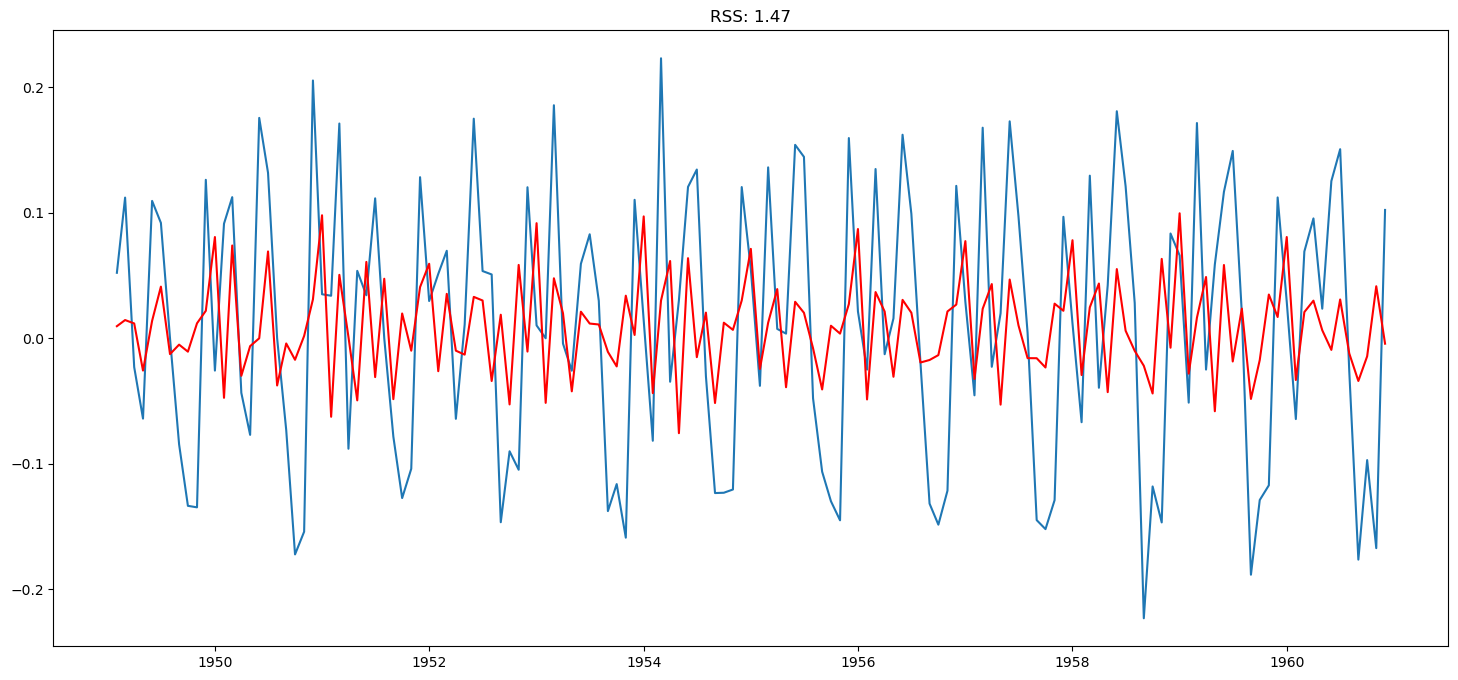

In [227]:
## MA Model
model=ARIMA(ts_log_diff, order=(0, 0, 2),freq='MS')
results_MA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.2f'%sum((results_MA.fittedvalues-ts_log_diff)**2))


### Combined Model

Text(0.5, 1.0, 'RSS: 1.2170')

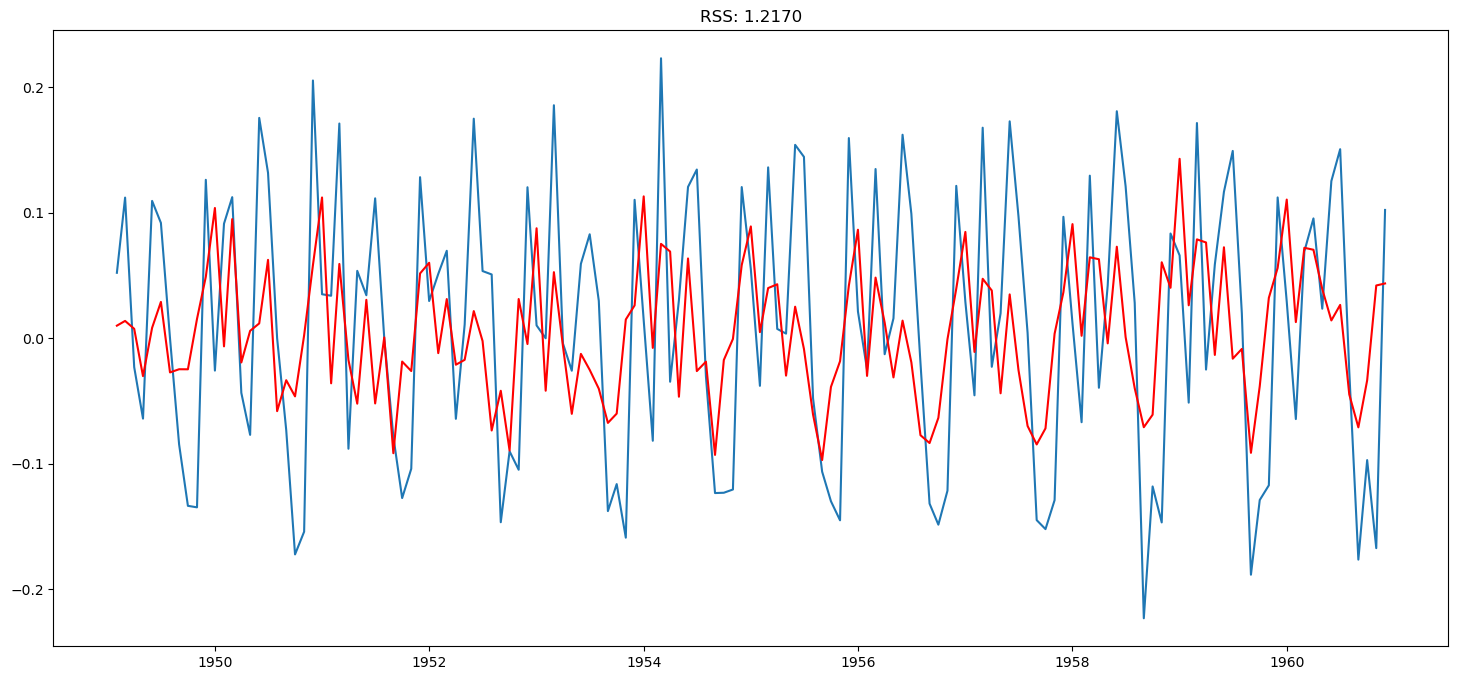

In [231]:
model = ARIMA(ts_log_diff,order=(2,0, 2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [232]:
# summary of fit model
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 137.616
Date:                Mon, 16 Dec 2024   AIC                           -263.232
Time:                        18:41:15   BIC                           -245.455
Sample:                    02-01-1949   HQIC                          -256.008
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.001     12.101      0.000       0.008       0.012
ar.L1          0.2739      0.162      1.696      0.090      -0.043       0.590
ar.L2          0.1708      0.155      1.099      0.2

In [233]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.010049
1949-03-01    0.013834
1949-04-01    0.007555
1949-05-01   -0.030180
1949-06-01    0.008329
dtype: float64


In [234]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.010049
1949-03-01    0.023883
1949-04-01    0.031438
1949-05-01    0.001258
1949-06-01    0.009587
dtype: float64


In [235]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728548
1949-03-01    4.742382
1949-04-01    4.749937
1949-05-01    4.719757
dtype: float64

Text(0.5, 1.0, 'RMSE: 135.5837')

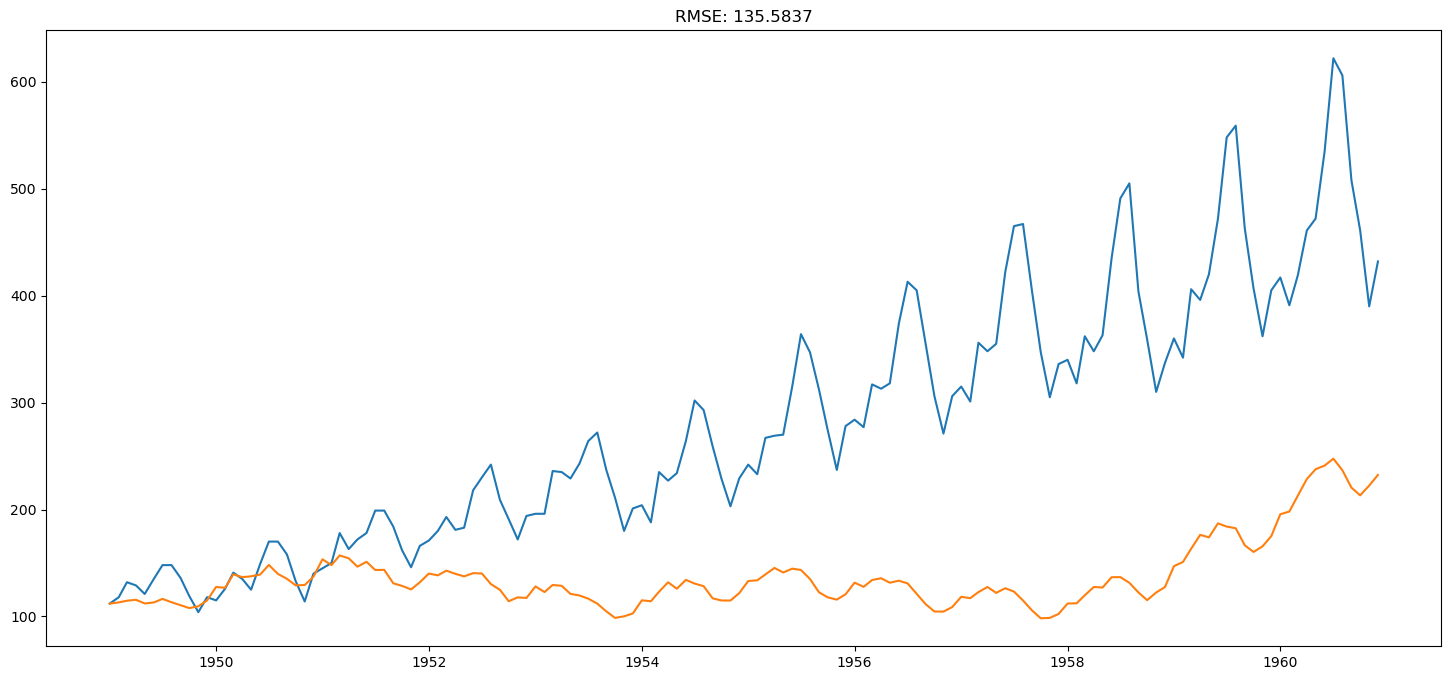

In [238]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts_log)**2)/len(ts)))

### Auto ARIMA Model

In [239]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ------------------------------- ------ 524.3/625.1 kB 192.9 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/625.1 kB 192.9 kB/s eta 0:00:01
   -------------------------------------- 625.1/625.1 kB 213.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
 #Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [241]:
#Read the AirPassengers dataset
airline = pd.read_csv('D:/MLDatasets/AirPassengers.csv', index_col = 'Month', parse_dates = True)

# Print the first five rows of the dataset
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [243]:
from statsmodels.tsa.seasonal import seasonal_decompose
#ETS Decomposition
result = seasonal_decompose(airline['#Passengers'], model = 'multiplicative')


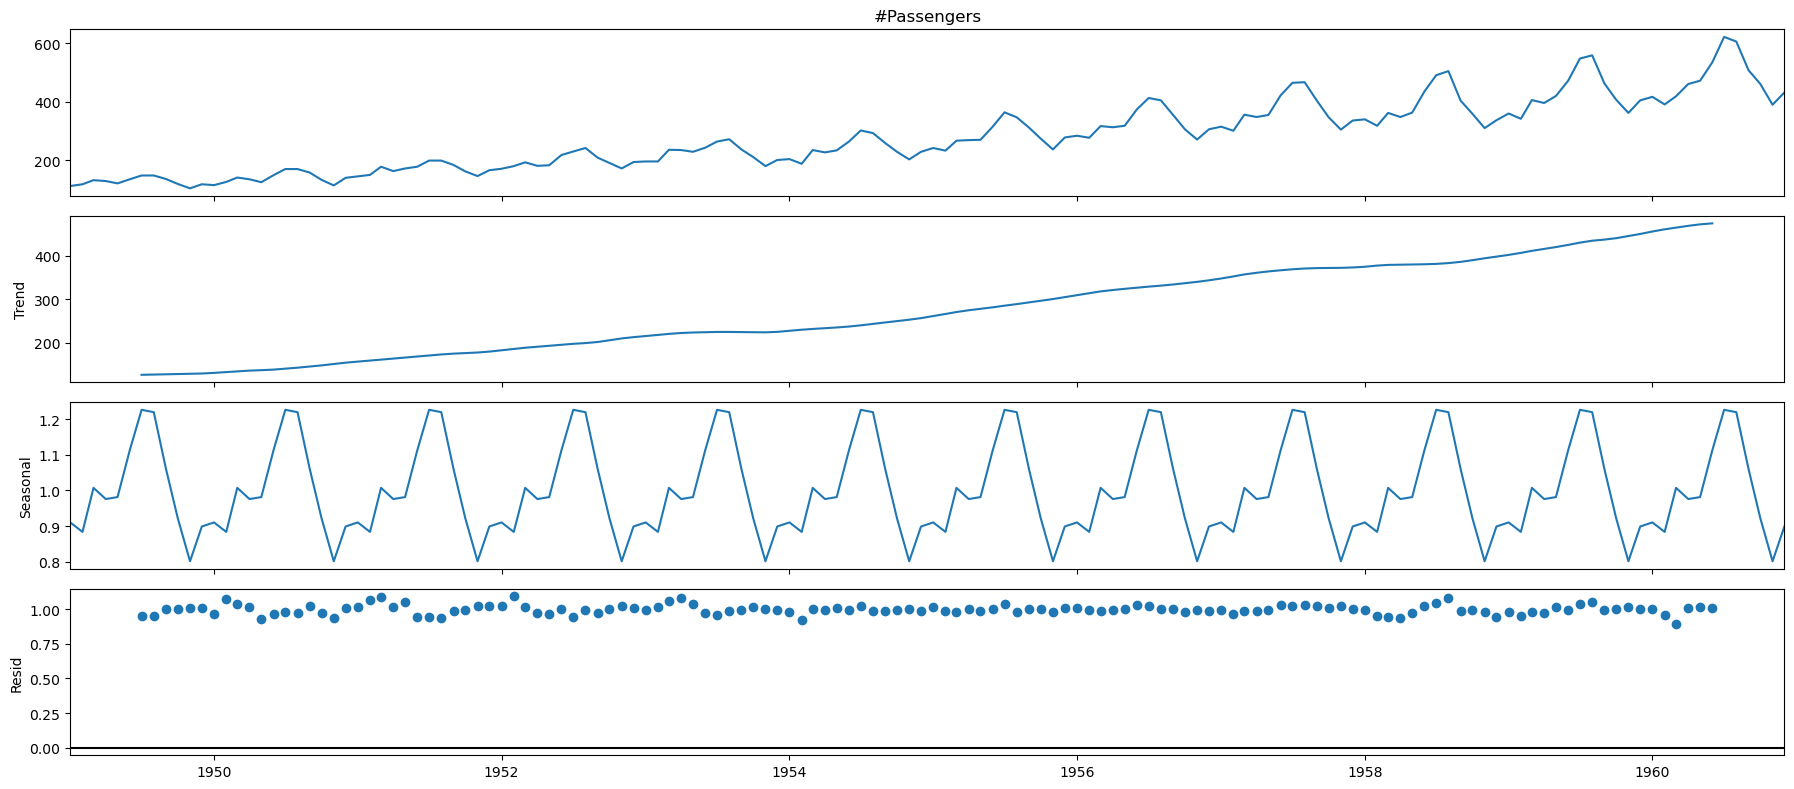

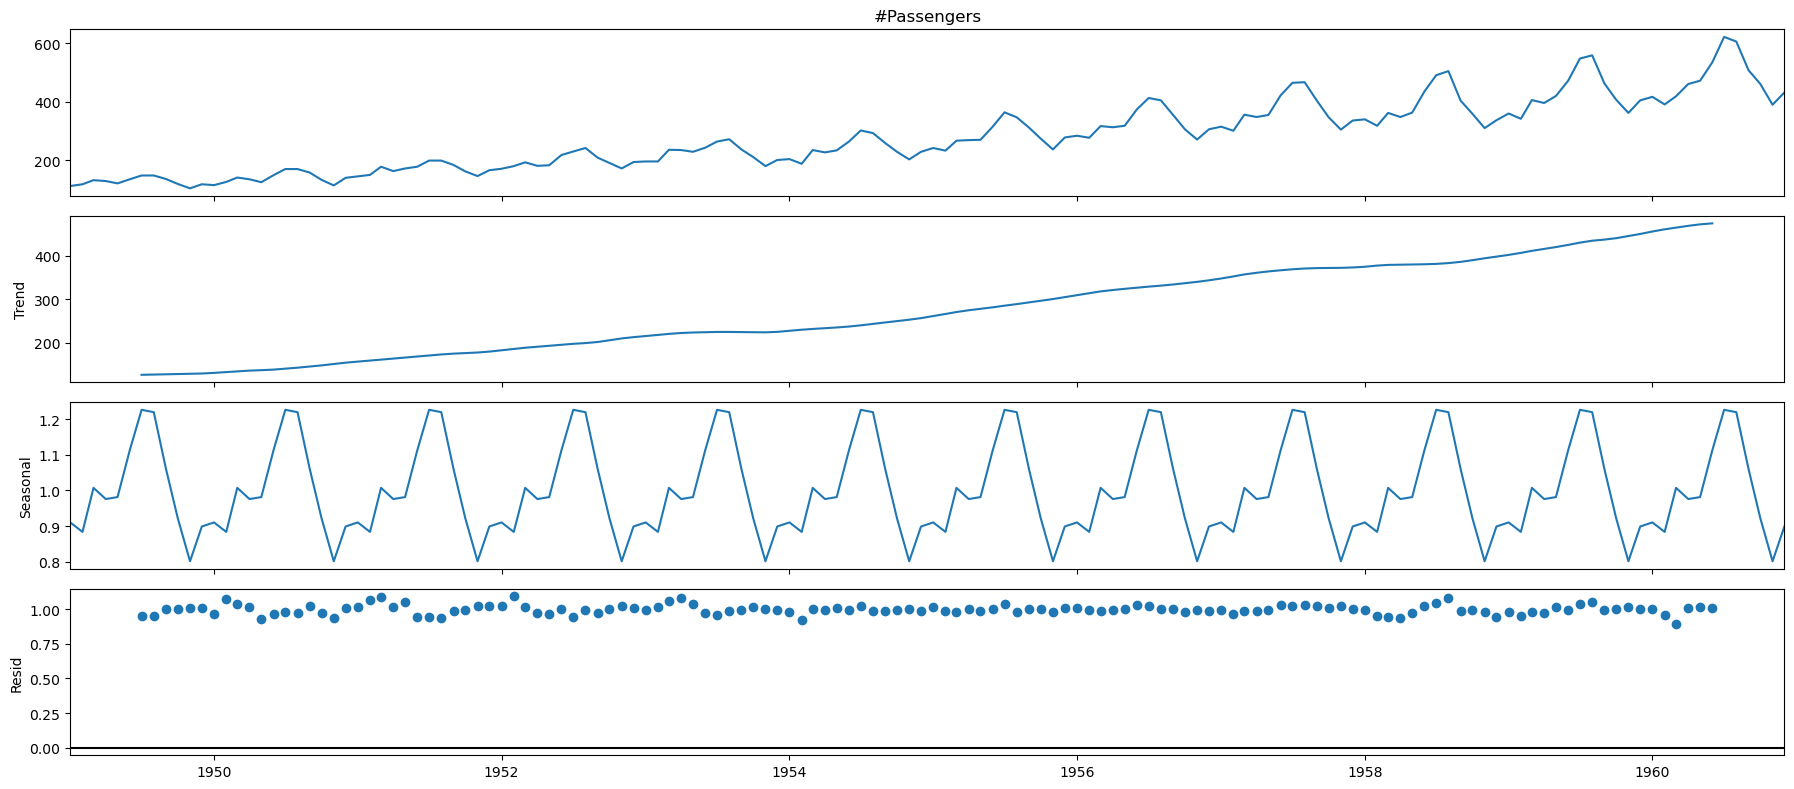

In [245]:
#ETS plot
result.plot()

In [246]:
# Fit auto_arima function to AirPassengers dataset
from pmdarima import auto_arima
stepwise_fit = auto_arima(airline['#Passengers'],start_p = 1,start_q = 1,
                         max_p = 3,max_q = 3,m = 12,
                         start_P = 0, seasonal = True,
                         d = None,D = 1,trace = True,
                         error_action = 'ignore',       ## we dont want to know if order does not work
                         suppress_warnings = True,
                          stepwise = True)
                                                        ## we dont want convergence warnings
                                                        ## set to stepwise
# to printthe summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=1.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=1.75 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=3.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.49 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=1.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.58 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=3.44 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=4.20 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=2.63 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=1.22 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=7.43 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 17 Dec 2024   AIC                           1019.178
Time:                                     11:04:25   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [249]:
len(airline)

144

In [251]:
#split the data into train /Test sets
train= airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:]# set one year(12 months) for testing

# Fit a  SARIMAX(0,1,1)X(2,1,1,12) on the training set
from statsmodels.tsa.statespace.sarimax  import SARIMAX

model = SARIMAX(train['#Passengers'],
                order = (0,1,1),
                seasonal_order = (2,1,0,12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Tue, 17 Dec 2024   AIC                            901.659
Time:                                     11:23:52   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2408     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction

In [252]:
len(train)

132

<Axes: xlabel='Month'>

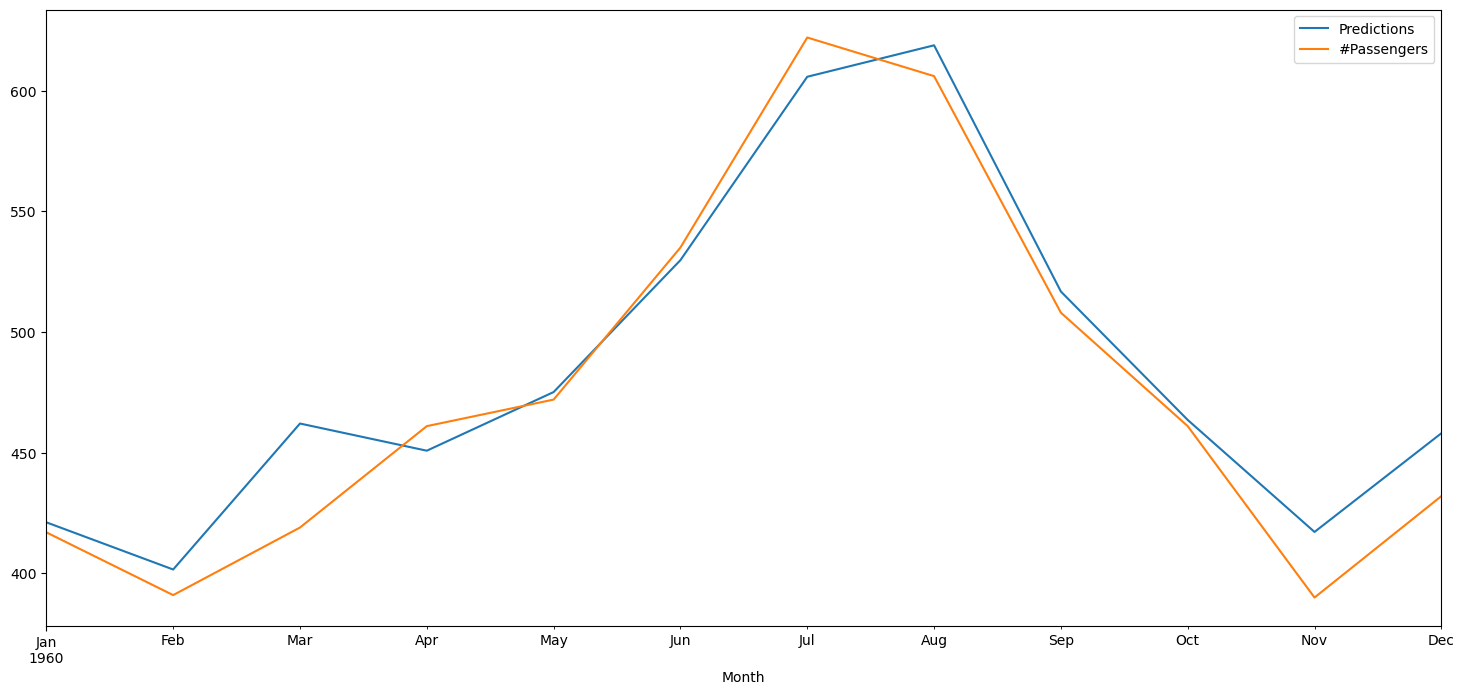

In [255]:
start = len(train)
end = len(train)+ len(test) -1

# Predictions for one-year against the test set
predictions= result.predict(start, end, 
                            typ = 'levels').rename("Predictions")

# Plot Prediction and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend=True)

In [256]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test['#Passengers'], predictions)


18.380777586016137

In [257]:
# calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)

337.8529846665932

### Forecast using ARIM Model

<Axes: xlabel='Month'>

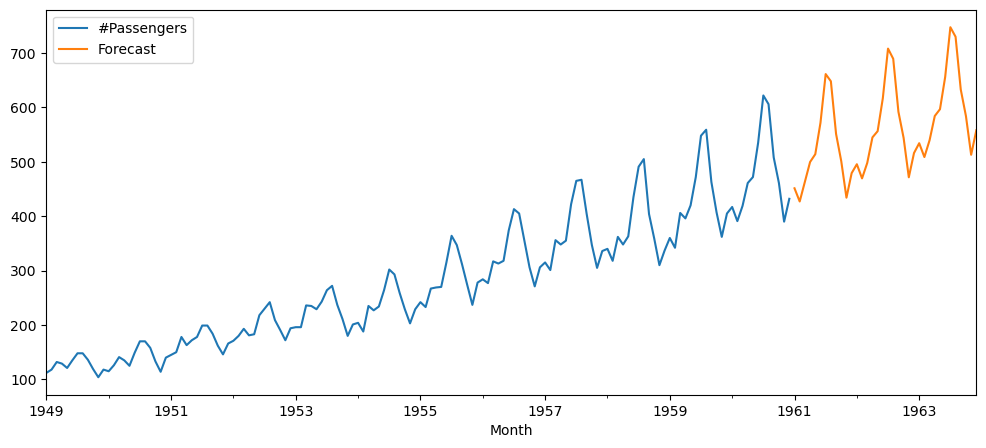

In [260]:
# Train the model on the full dataset
model = SARIMAX(airline['#Passengers'],
                order =(0,1,1),
                seasonal_order=(2,1,0,12))
result = model.fit()

# Forecast for next 3 years
forecast = result.predict(start = len(airline),
                          end =(len(airline)-1) +3 *12,
                          typ = 'levels').rename('Forecast')
#plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5),legend = True)
forecast.plot(legend=True)



